In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
import pandas as pd

# Load the training data
train_data = pd.read_csv("train.csv")

# Display the first 5 rows
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check the size of the data
print("Data shape:", train_data.shape)  # Rows and columns

# Overview of data types and non-null values
train_data.info()

# Check for missing values
missing_values = train_data.isnull().sum()
print("Missing values:\n", missing_values)

Data shape: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null 

In [5]:
# Display column names
print("Columns:", train_data.columns)

# Target variable
print("Target variable: SalePrice")

Columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'P

In [6]:
# Fill missing numerical values with mean
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].mean())

# Fill missing categorical values with mode
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

# Check if missing values are resolved
print(train_data.isnull().sum().sum())  # Should be 0

0


In [7]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [8]:
# Apply One-Hot Encoding
train_data = pd.get_dummies(train_data, drop_first=True)

# Check the data after encoding
train_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


In [9]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

# Check scaled data
train_data[numerical_cols].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


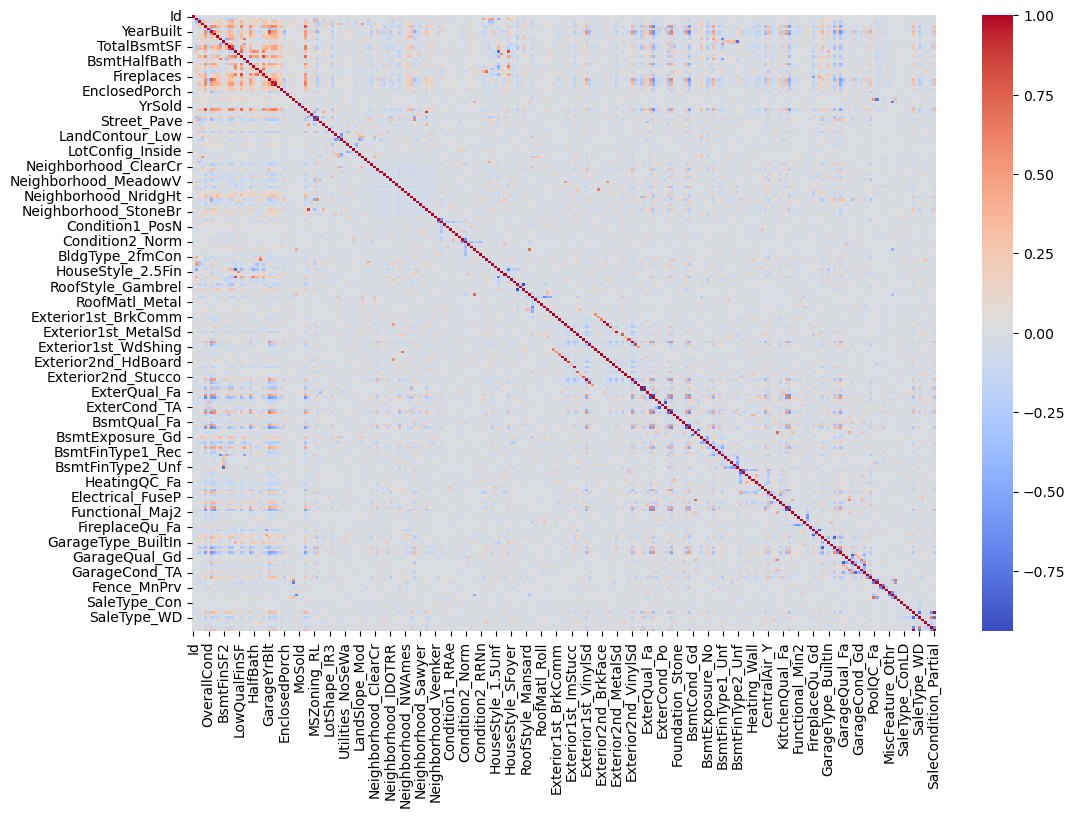

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), cmap="coolwarm", annot=False)
plt.show()

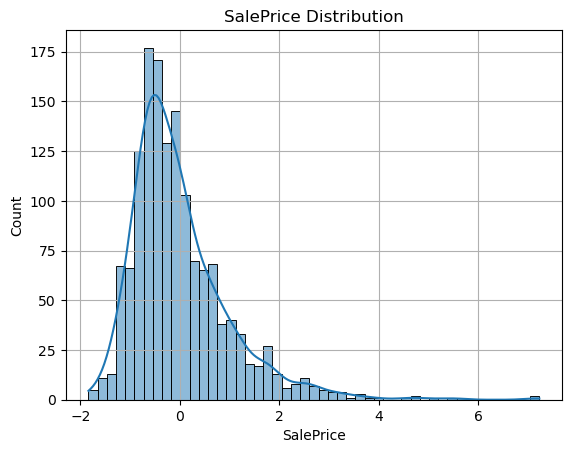

In [11]:
# Plot SalePrice distribution
sns.histplot(train_data['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.grid()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = train_data.drop('SalePrice', axis=1)  # Drop the target column
y = train_data['SalePrice']  # Keep the target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1168, 245)
Testing set size: (292, 245)


In [21]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

R² Score: -1.1177951514490826e+21
Mean Absolute Error (MAE): 2170833434.2523975
Mean Squared Error (MSE): 1.3594642230982187e+21


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest R² Score:", r2_rf)
print("Random Forest Mean Absolute Error (MAE):", mae_rf)
print("Random Forest Mean Squared Error (MSE):", mse_rf)

Random Forest R² Score: 0.8906764135424138
Random Forest Mean Absolute Error (MAE): 0.22146313645134635
Random Forest Mean Squared Error (MSE): 0.13295951797357863


In [29]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, "house_price_model.pkl")
print("Model saved as house_price_model.pkl")

Model saved as house_price_model.pkl


In [30]:
# Load the saved model
loaded_model = joblib.load("house_price_model.pkl")

# Make a prediction
example_prediction = loaded_model.predict(X_test[:1])
print("Predicted house price:", example_prediction)

Predicted house price: [-0.51360002]


In [31]:
# Make predictions for the testing set
y_pred = rf_model.predict(X_test)

# Compare predictions with actual prices
predictions_df = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_pred})
print(predictions_df.head(10))

      Actual Price  Predicted Price
892      -0.332697        -0.513600
1105      1.814245         1.786590
413      -0.830082        -0.792573
522      -0.276032        -0.323269
1036      1.694621         1.765499
614      -1.327467        -1.191876
218       1.644253         0.354503
1160     -0.439729        -0.382192
649      -1.214139        -1.196025
887      -0.571945        -0.631392


In [36]:
from sklearn.preprocessing import StandardScaler

# Assuming scaler was used on SalePrice
scaler = StandardScaler()

In [38]:
# Inverse transform actual and predicted prices to get original scale
# y_test_original = scaler.inverse_transform(y_test.values.reshape(-1, 1))
# y_pred_original = scaler.inverse_transform(y_pred.reshape(-1, 1))

# # Create a DataFrame for better comparison
# predictions_df = pd.DataFrame({
#     "Actual Price": y_test_original.flatten(),
#     "Predicted Price": y_pred_original.flatten()
# })
# print(predictions_df.head(10))

In [40]:
from sklearn.preprocessing import StandardScaler

# Assuming SalePrice was scaled during preprocessing
scaler = StandardScaler()
train_data['SalePrice'] = scaler.fit_transform(train_data['SalePrice'].values.reshape(-1, 1))

In [42]:
# Fit the scaler on the training target (SalePrice)
scaler = StandardScaler()
train_data['SalePrice'] = scaler.fit_transform(train_data['SalePrice'].values.reshape(-1, 1))

# Save the fitted scaler for later use
saleprice_scaler = scaler

In [44]:
# Ensure the scaler is fitted
if not hasattr(saleprice_scaler, 'mean_'):
    print("Scaler is not fitted. Check preprocessing.")
else:
    # Inverse transform the scaled actual and predicted prices
    y_test_original = saleprice_scaler.inverse_transform(y_test.values.reshape(-1, 1))
    y_pred_original = saleprice_scaler.inverse_transform(y_pred.reshape(-1, 1))

    # Create a DataFrame for comparison
    predictions_df = pd.DataFrame({
        "Actual Price": y_test_original.flatten(),
        "Predicted Price": y_pred_original.flatten()
    })
    print(predictions_df.head(10))

   Actual Price  Predicted Price
0     -0.332697        -0.513600
1      1.814245         1.786590
2     -0.830082        -0.792573
3     -0.276032        -0.323269
4      1.694621         1.765499
5     -1.327467        -1.191876
6      1.644253         0.354503
7     -0.439729        -0.382192
8     -1.214139        -1.196025
9     -0.571945        -0.631392


In [46]:
predictions_df = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred
})
print(predictions_df.head(10))

      Actual Price  Predicted Price
892      -0.332697        -0.513600
1105      1.814245         1.786590
413      -0.830082        -0.792573
522      -0.276032        -0.323269
1036      1.694621         1.765499
614      -1.327467        -1.191876
218       1.644253         0.354503
1160     -0.439729        -0.382192
649      -1.214139        -1.196025
887      -0.571945        -0.631392


In [48]:
print(y_test.head())

892    -0.332697
1105    1.814245
413    -0.830082
522    -0.276032
1036    1.694621
Name: SalePrice, dtype: float64
